In [2]:
# Import Libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data:

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Data Analysis:

df = df.drop(['oldpeak','thall','slp'], axis=1)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [6]:
df.shape

(303, 11)

In [7]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

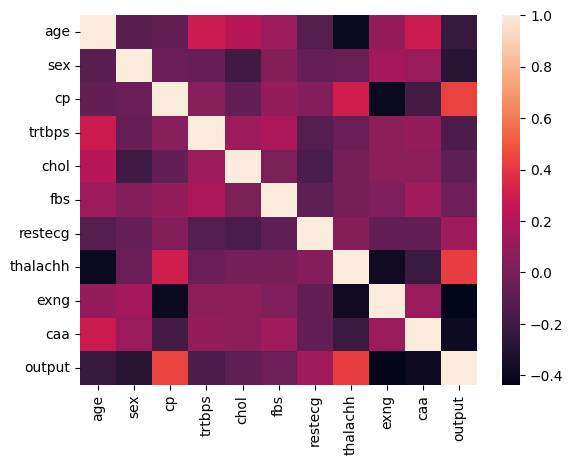

In [8]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Age of patients'}, xlabel='age', ylabel='count'>

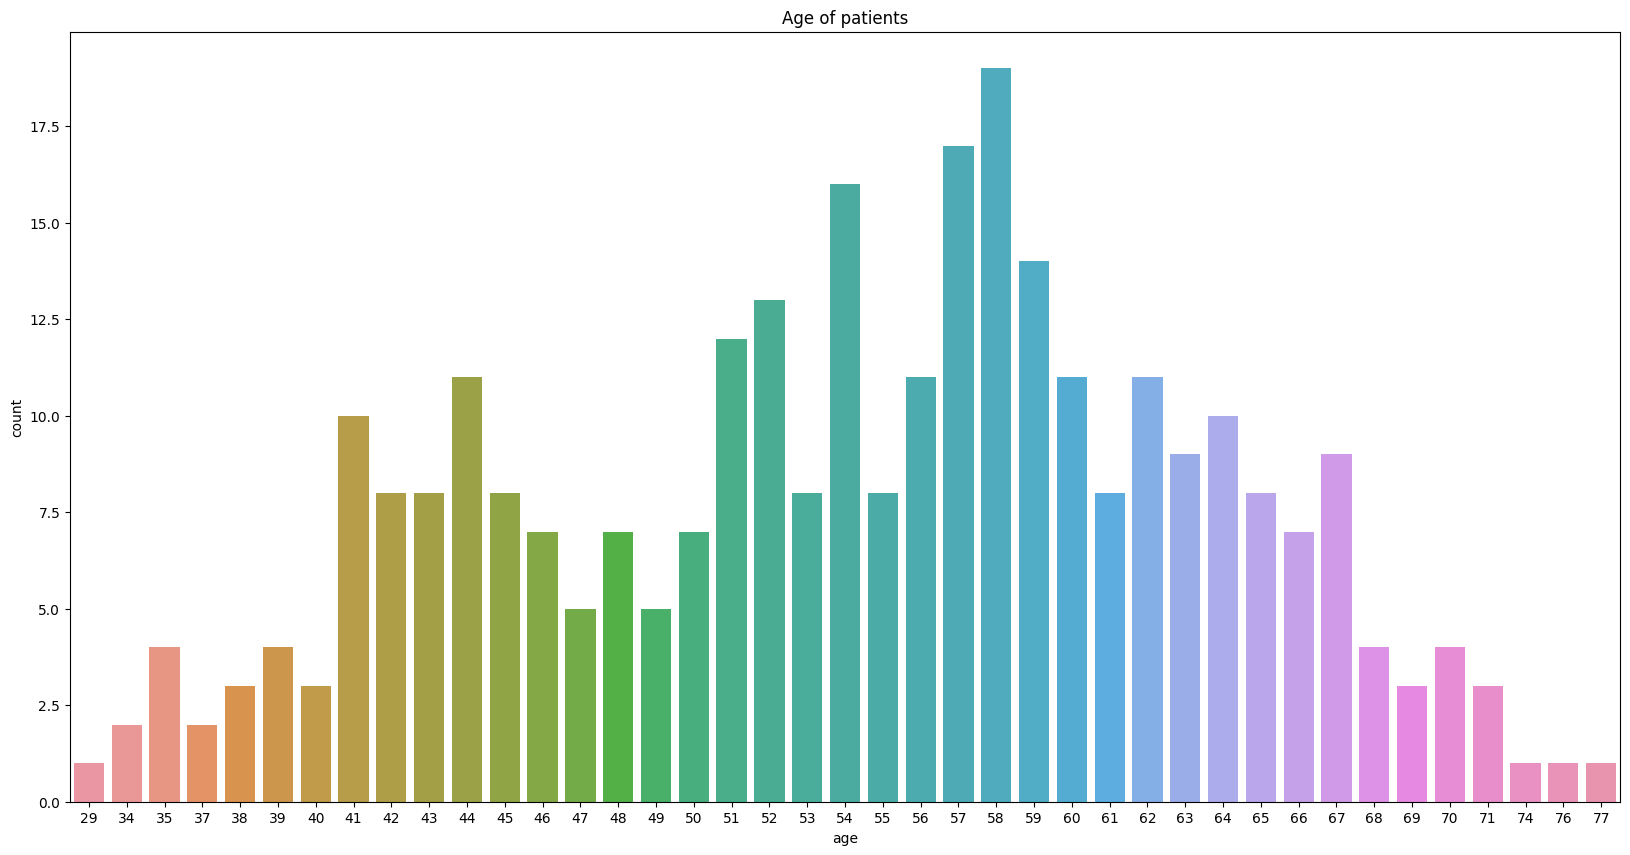

In [9]:
# Univariate and Bivariate data analysis:

plt.figure(figsize=(20,10))
plt.title("Age of patients")
plt.xlabel('Age')
sns.countplot(x='age', data=df)

<Axes: title={'center': 'Sex of patients--0:Female, 1:Male'}, xlabel='sex', ylabel='count'>

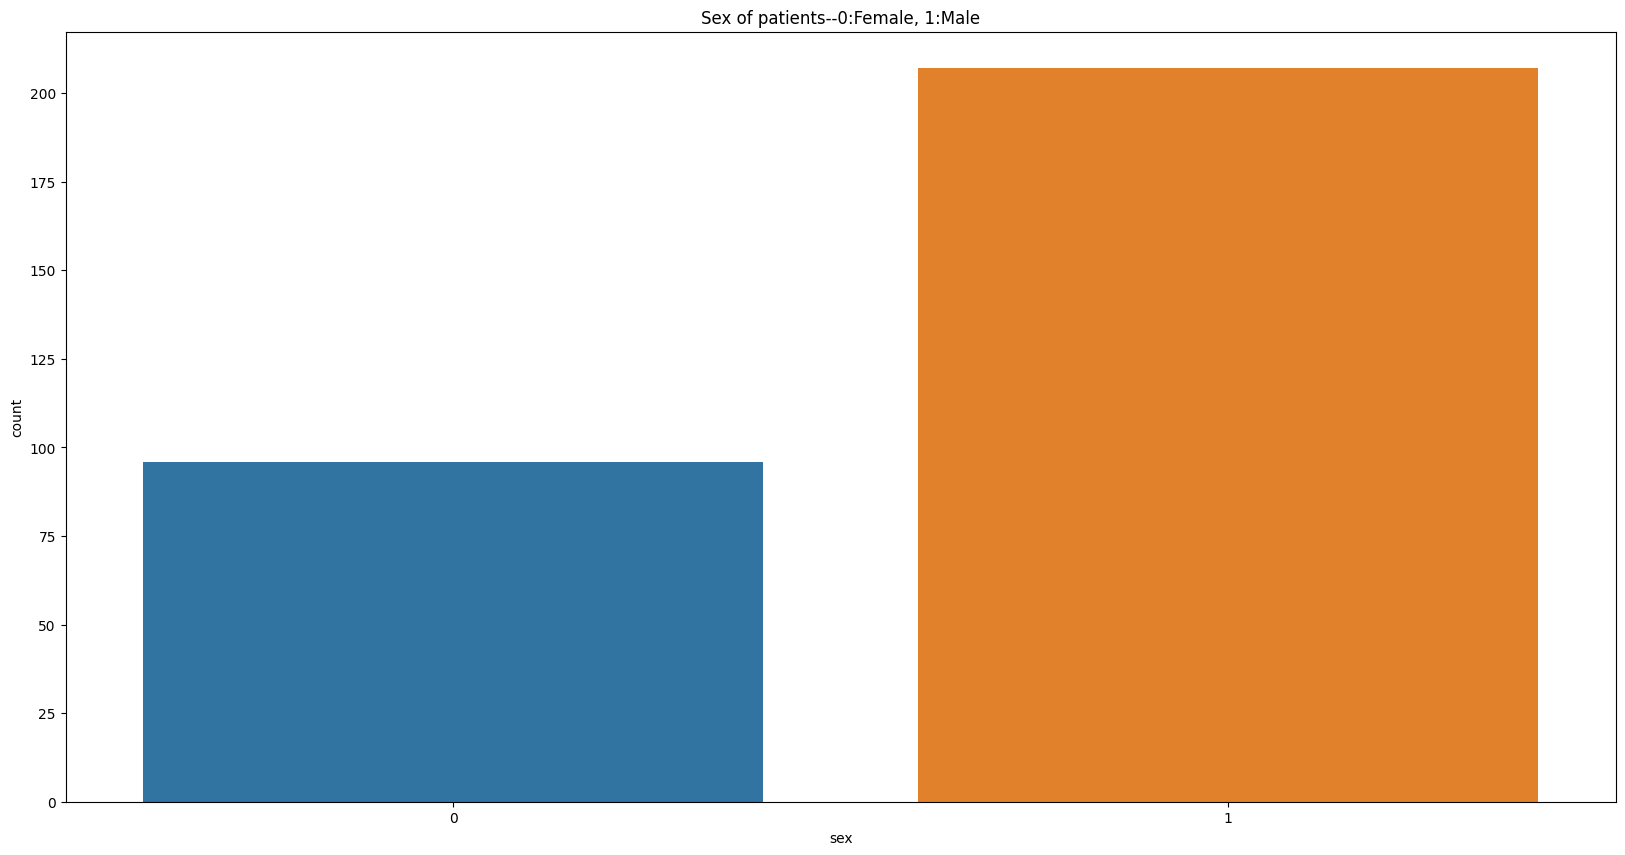

In [10]:
plt.figure(figsize=(20,10))
plt.title("Sex of patients--0:Female, 1:Male")
sns.countplot(x='sex', data=df)

In [11]:
cp_data = df['cp'].value_counts().reset_index()
cp_data['index'][3] = 'Asymptomatic'
cp_data['index'][2] = 'Non-anginal'
cp_data['index'][1] = 'Atypical Anigma'
cp_data['index'][0] = 'Typical Anigma'
cp_data

,index,cp
0,Typical Anigma,143
1,Atypical Anigma,87
2,Non-anginal,50
3,Asymptomatic,23


<Axes: title={'center': 'Chest pain in patients'}, xlabel='index', ylabel='cp'>

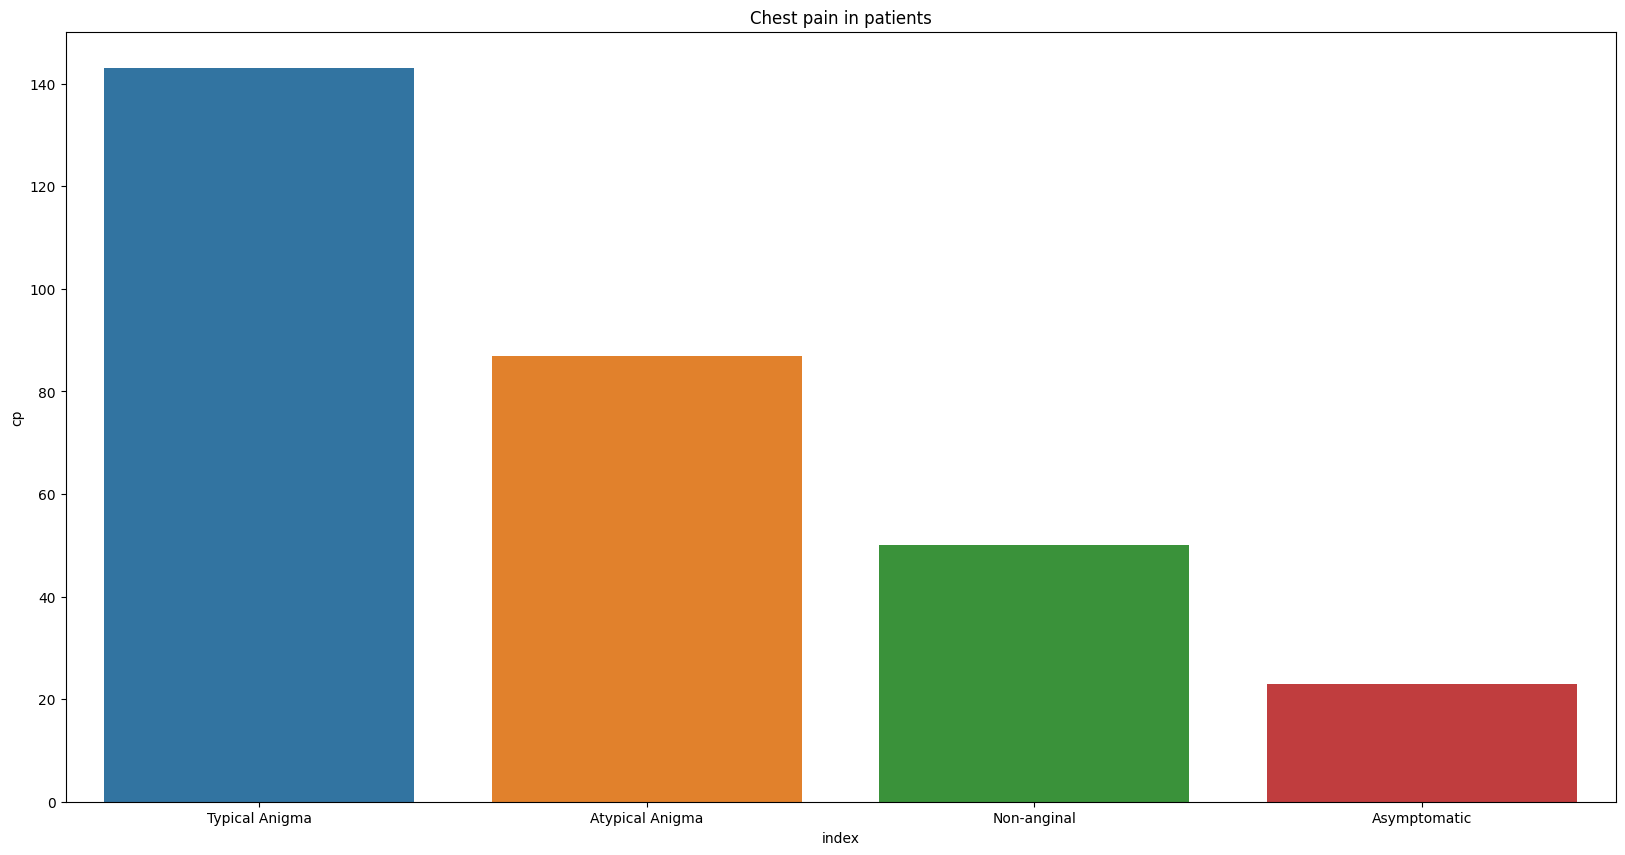

In [12]:
plt.figure(figsize=(20,10))
plt.title("Chest pain in patients")
sns.barplot(x=cp_data['index'], y=cp_data['cp'])

In [13]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data['index'][0] = 'Normal'
ecg_data['index'][1] = 'Having ST-T wave abnormality'
ecg_data['index'][2] = 'Showing probable or definite left ventricular hypertrophy by Estes'
ecg_data

,index,restecg
0,Normal,152
1,Having ST-T wave abnormality,147
2,Showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of patients'}, xlabel='index', ylabel='restecg'>

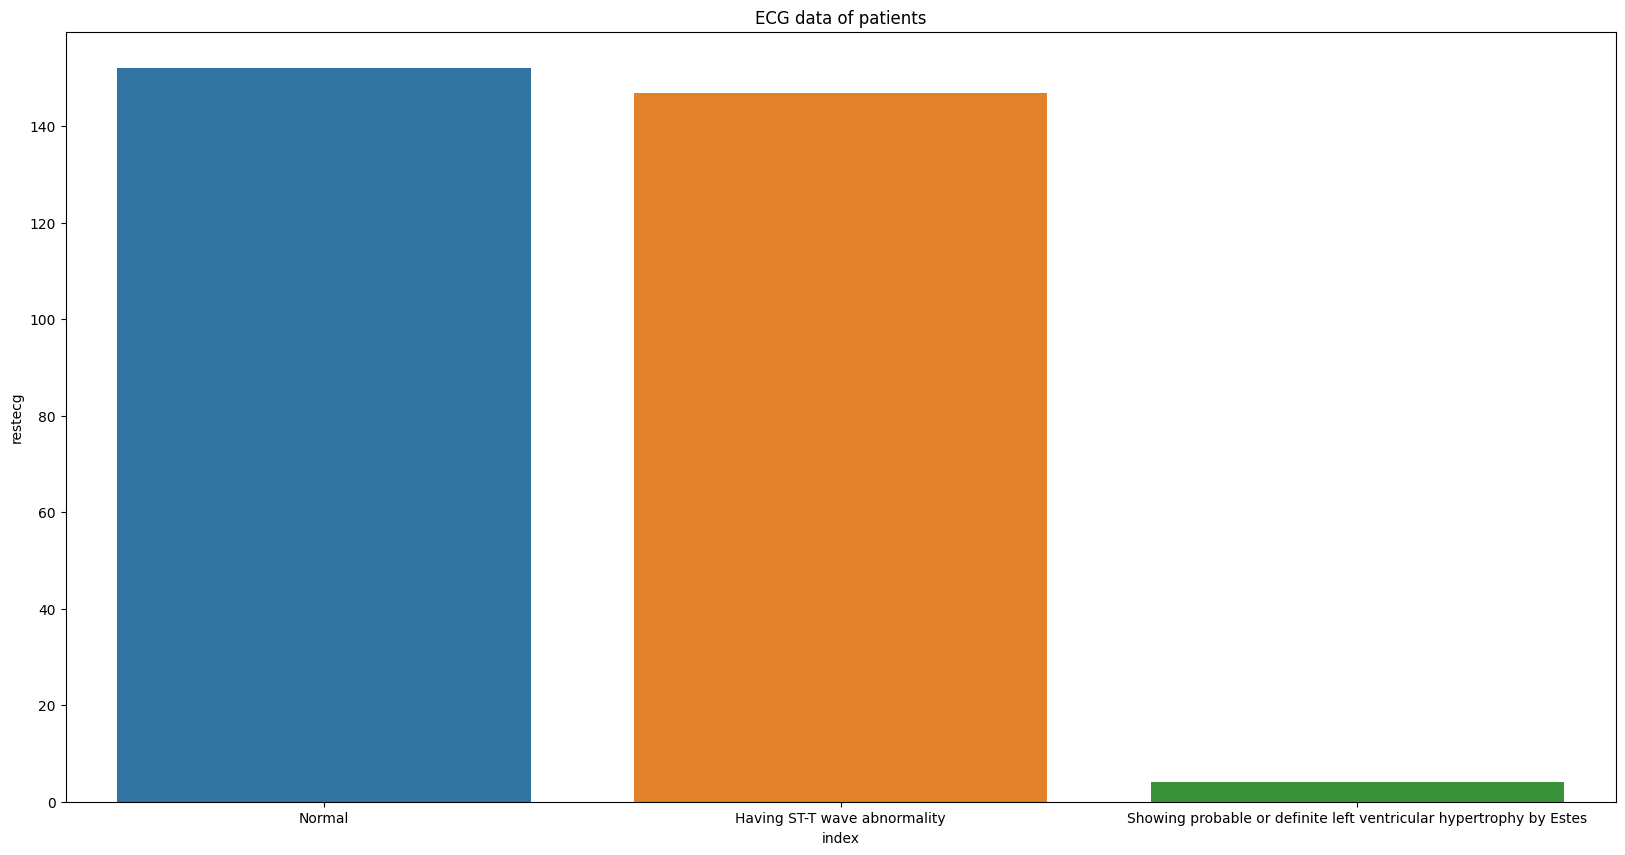

In [14]:
plt.figure(figsize=(20,10))
plt.title("ECG data of patients")
sns.barplot(x=ecg_data['index'], y=ecg_data['restecg'])

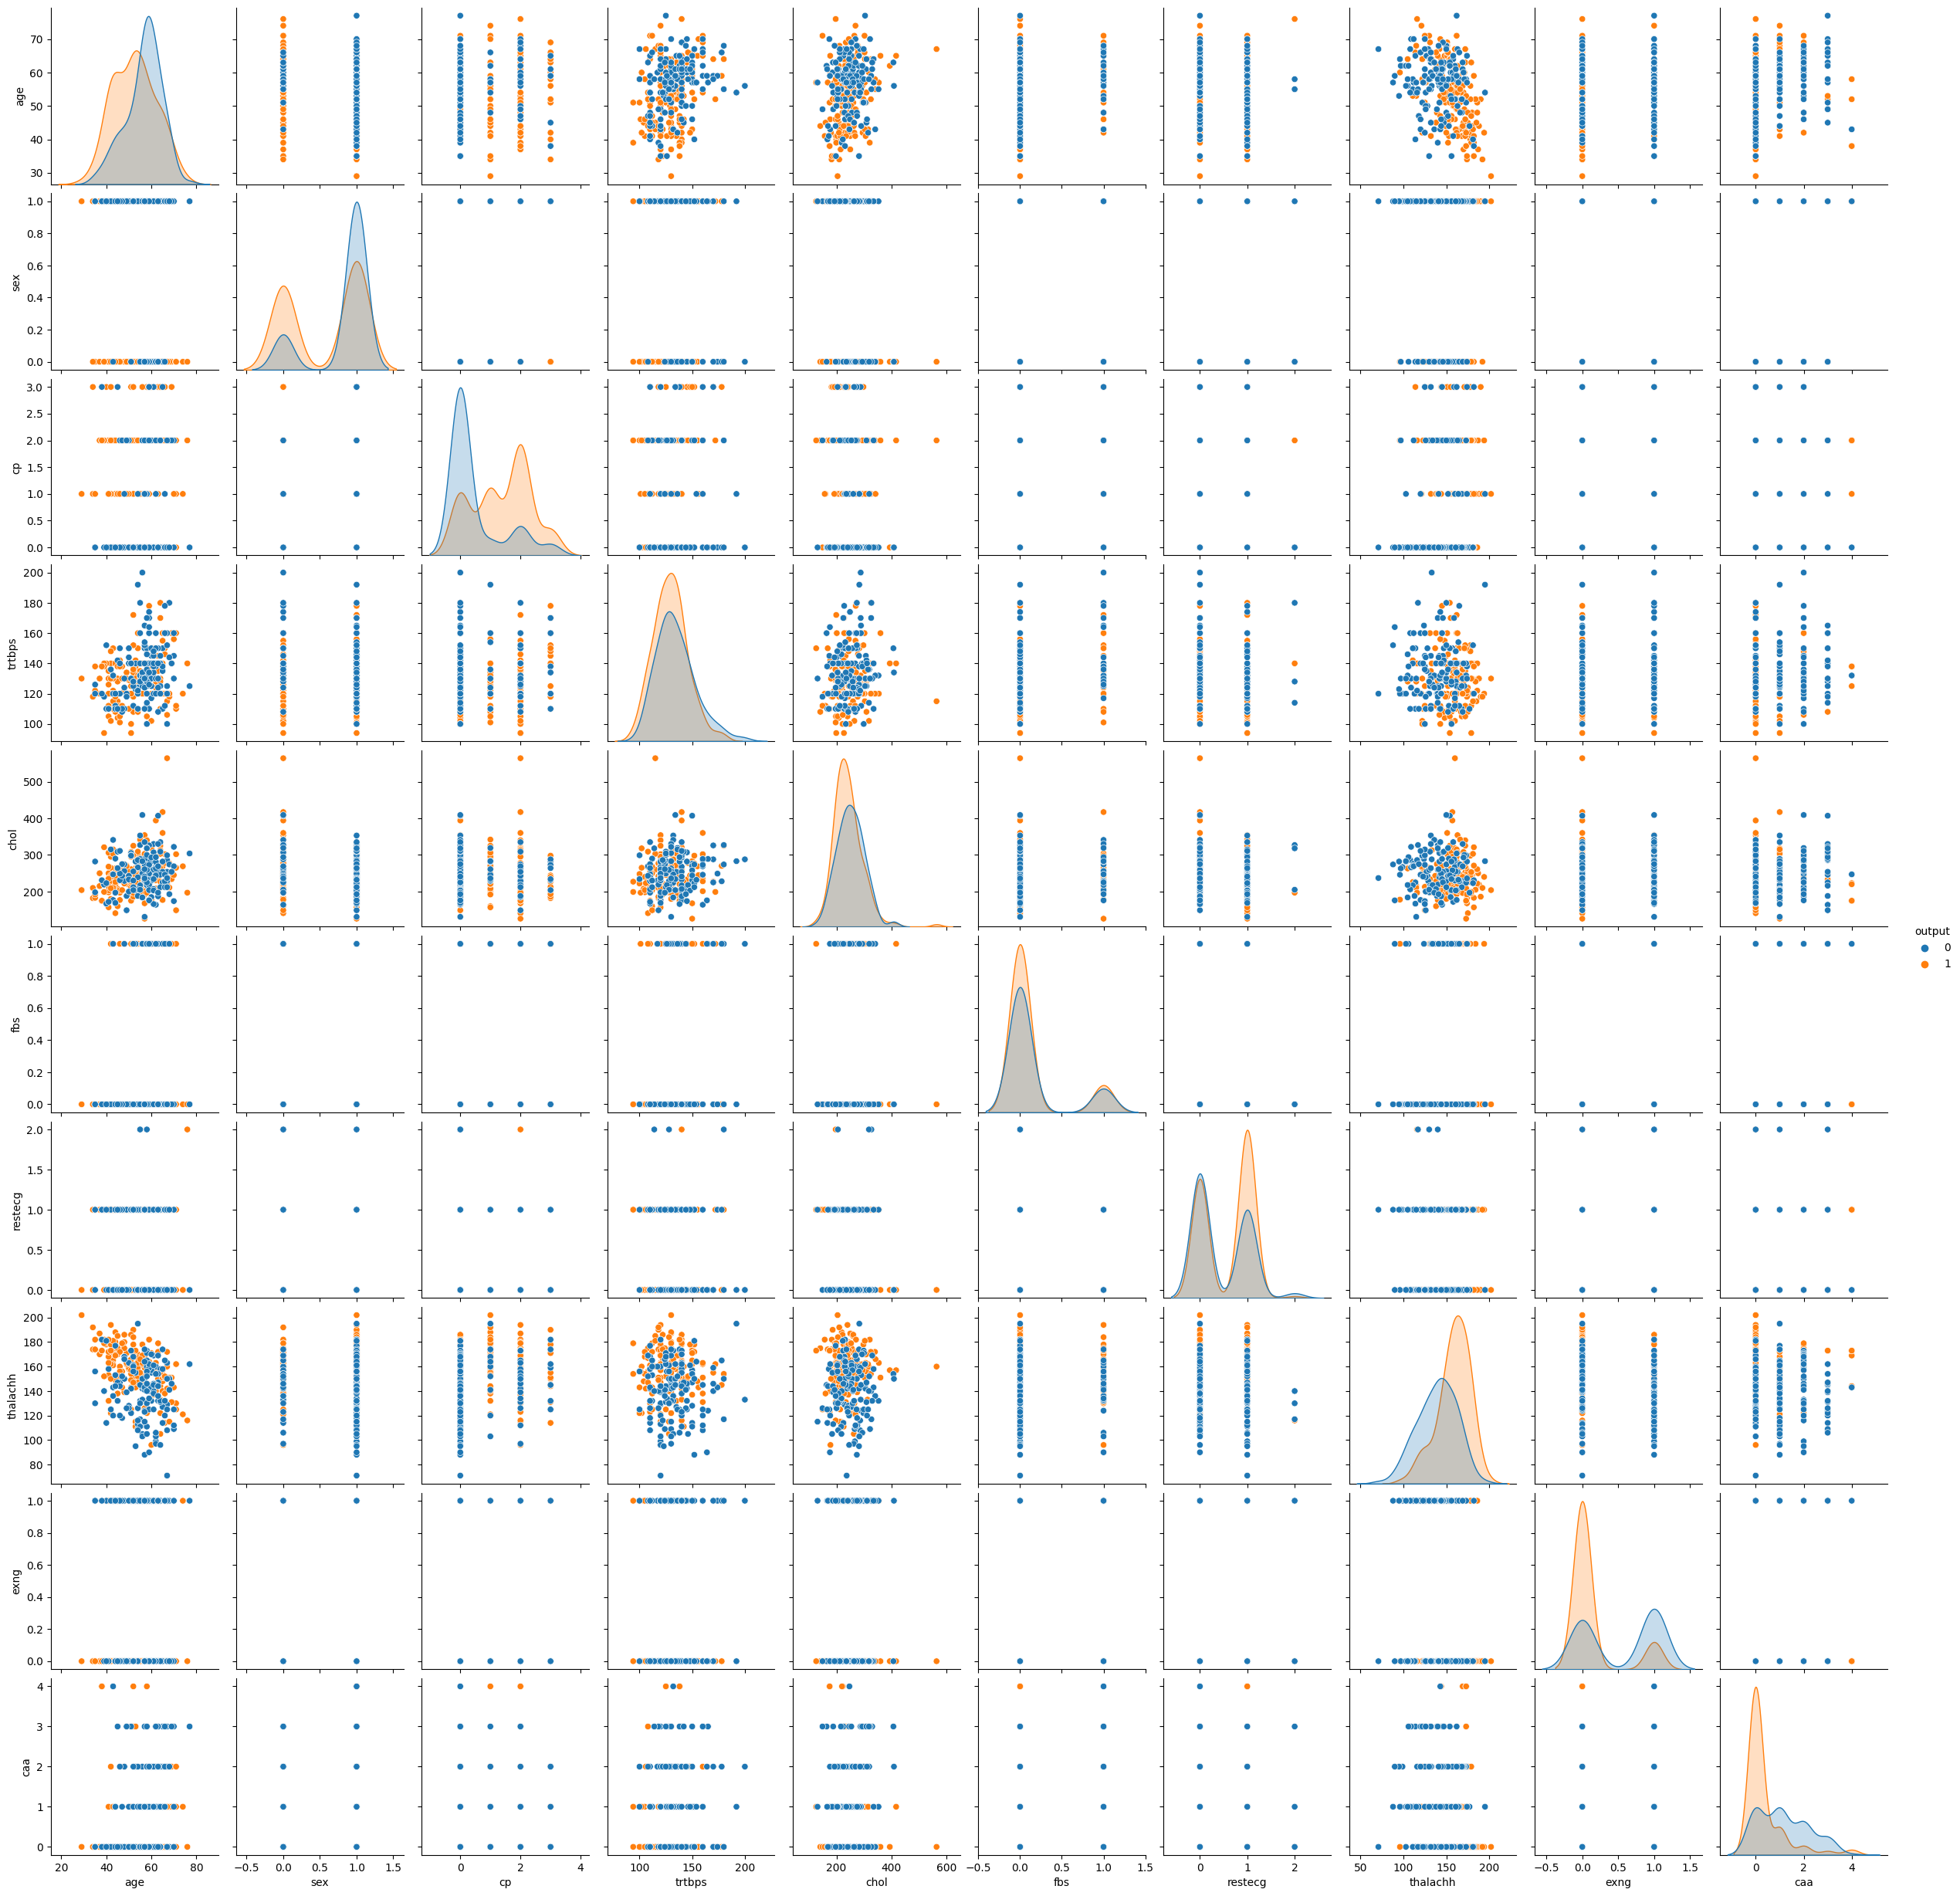

In [15]:
sns.pairplot(df, hue='output')

Text(0.5, 9.444444444444438, 'Resting blood pressure (mmHg)')

<Figure size 2000x1000 with 0 Axes>

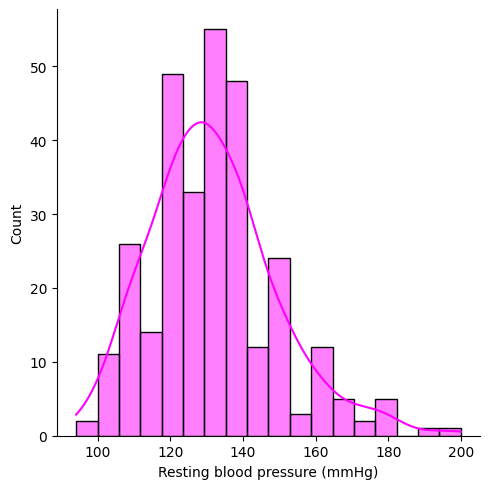

In [16]:
# For Continuous variables:

plt.figure(figsize=(20,10))

sns.displot(df['trtbps'], kde=True, color='magenta')
plt.xlabel('Resting blood pressure (mmHg)')



Text(0.5, 9.444444444444438, 'Maximum heart rate achieved (bpm)')

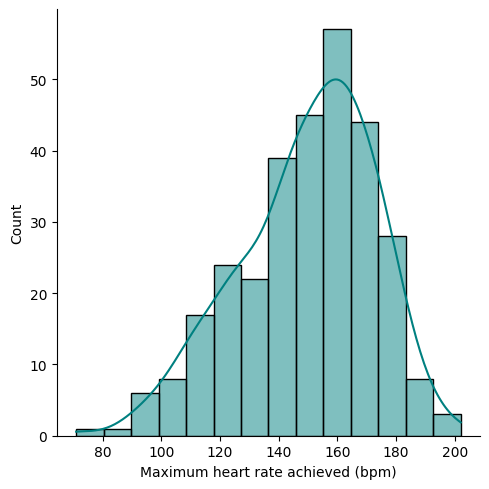

In [17]:
sns.displot(df['thalachh'], kde=True, color='teal')
plt.xlabel("Maximum heart rate achieved (bpm)")

Text(0.5, 9.444444444444438, 'Cholestrol')

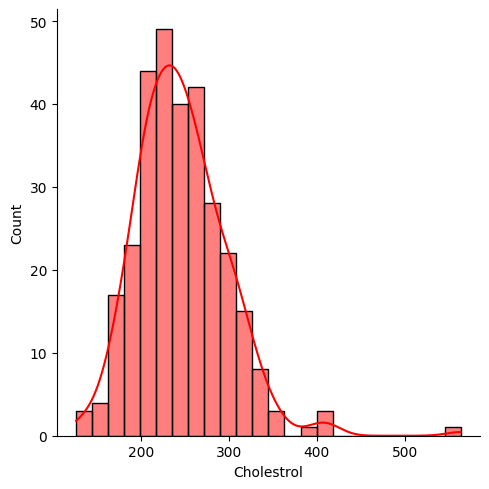

In [18]:
sns.displot(df['chol'], kde=True, color='red')
plt.xlabel("Cholestrol")

In [19]:
# Standardisation of the data:

from sklearn.preprocessing import StandardScaler

In [20]:
scale = StandardScaler()
scale.fit(df)
df = scale.transform(df)

In [21]:
df = pd.DataFrame(df, columns=['Age','Sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','caa','Output'])
df.head()

,Age,Sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,Output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [22]:
x = df.iloc[:, :-1]
x

,Age,Sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [23]:
y = df.iloc[:,-1:]
y

,Output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [24]:
## Model Fitting:
# Split the data:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [25]:
# Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
lbl = LabelEncoder()
encoded_y = lbl.fit_transform(y_train)
encoded_y_test = lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
Logistic = LogisticRegression()
Logistic.fit(x_train, encoded_y)

LogisticRegression()

In [28]:
ypred_1 = Logistic.predict(x_test)
Logistic_confusion_matrix = confusion_matrix(encoded_y_test, ypred_1)
Logistic_accuracy_score = accuracy_score(encoded_y_test, ypred_1)

In [29]:
Logistic_confusion_matrix

array([[35,  9],
       [ 4, 43]])

In [30]:
print(Logistic_accuracy_score*100,"%")

85.71428571428571 %


In [31]:
# Decision Tree Classifier:

from sklearn.tree import DecisionTreeClassifier

In [32]:
tree = DecisionTreeClassifier()
tree.fit(x_train, encoded_y)

DecisionTreeClassifier()

In [33]:
ypred_2 = tree.predict(x_test)
tree_confusion_matrix = confusion_matrix(encoded_y_test, ypred_2)
tree_accuracy_score = accuracy_score(encoded_y_test, ypred_2)

In [34]:
tree_confusion_matrix

array([[27, 17],
       [ 9, 38]])

In [35]:
print(tree_accuracy_score*100,"%")

71.42857142857143 %


In [36]:
# random Forest Classifier:

from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier()
forest.fit(x_train, encoded_y)

RandomForestClassifier()

In [38]:
ypred_3 = forest.predict(x_test)
forest_confusion_matrix = confusion_matrix(encoded_y_test, ypred_3)
forest_accuracy_score = accuracy_score(encoded_y_test, ypred_3)

In [39]:
forest_confusion_matrix

array([[31, 13],
       [ 6, 41]])

In [40]:
print(forest_accuracy_score*100,"%")

79.12087912087912 %


In [41]:
# K Nearest Neighbors:

from sklearn.neighbors import KNeighborsClassifier

In [42]:
# To find the optimum value of 'k':

error_rate = []
for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors = i)
  KNN.fit(x_train, encoded_y)
  ypred = KNN.predict(x_test)
  error_rate.append(np.mean(ypred!=encoded_y_test))


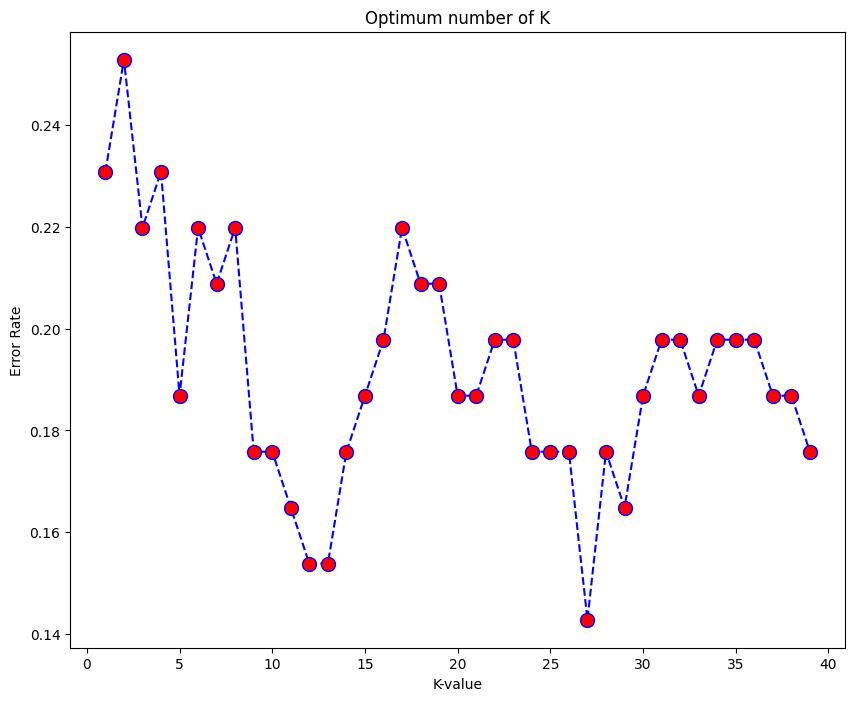

In [43]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Optimum number of K')
plt.show()

In [44]:
# Take k=12:

KNN = KNeighborsClassifier(n_neighbors = 12)
KNN.fit(x_train, encoded_y)
ypred_4 = KNN.predict(x_test)

In [45]:
KNN_confusion_matrix = confusion_matrix(encoded_y_test, ypred_4)
KNN_accuracy_score = accuracy_score(encoded_y_test, ypred_4)

In [46]:
KNN_confusion_matrix

array([[35,  9],
       [ 5, 42]])

In [47]:
print(KNN_accuracy_score*100,"%")

84.61538461538461 %


In [48]:
# Support Vector Machine:

from sklearn import svm

In [49]:
SVM = svm.SVC()
SVM.fit(x_train, encoded_y)
ypred_5 = SVM.predict(x_test)

In [50]:
SVM_confusion_matrix = confusion_matrix(encoded_y_test, ypred_5)
SVM_accuracy_score = accuracy_score(encoded_y_test, ypred_5)

In [51]:
SVM_confusion_matrix

array([[34, 10],
       [ 8, 39]])

In [52]:
print(SVM_accuracy_score *100,"%")

80.21978021978022 %


In [53]:
# A table for the accuracy of all the models:

Model_accuracy = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-neighbors Classifier', 'SVM'], 'Accuracy' : [Logistic_accuracy_score*100,tree_accuracy_score*100,forest_accuracy_score*100,KNN_accuracy_score*100,SVM_accuracy_score *100]})

In [54]:
Model_accuracy = Model_accuracy.sort_values(by=['Accuracy'],ascending=False )
Model_accuracy

,Model,Accuracy
0,Logistic Regression,85.714286
3,K-neighbors Classifier,84.615385
4,SVM,80.219780
2,Random Forest,79.120879
1,Decision Tree,71.428571


In [55]:
# Using AdaBoost Technique:

from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier(base_estimator=SVM, n_estimators=100, algorithm='SAMME', learning_rate=0.01, random_state=0)
ada.fit(x_train, encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [57]:
ypred_6 = ada.predict(x_test)
ada_confusion_matrix = confusion_matrix(encoded_y_test, ypred_6)
ada_accuracy_score = accuracy_score(encoded_y_test, ypred_6)

In [58]:
ada_confusion_matrix

array([[ 0, 44],
       [ 0, 47]])

In [59]:
print(ada_accuracy_score*100,"%")

51.64835164835166 %


In [60]:
# Using Grid Search for Hyperparameter Tuning for our top three performing models:

from sklearn.model_selection import GridSearchCV

In [61]:
param_grid= {

    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]

}

In [62]:
grid1= GridSearchCV(LogisticRegression(),param_grid)
grid1.fit(x_train,encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [63]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [64]:
# Logistic Regression:

Logistic_grid = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
Logistic_grid.fit(x_train,encoded_y)
Logistic_grid_pred = Logistic_grid.predict(x_test)
Logistic_grid_pred_conf_matrix = confusion_matrix(encoded_y_test,Logistic_grid_pred)
Logistic_grid_pred_acc_score = accuracy_score(encoded_y_test, Logistic_grid_pred)

In [65]:
Logistic_grid_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [66]:
print(Logistic_grid_pred_acc_score*100,"%")

81.31868131868131 %


In [67]:
# KNN:

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [68]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [69]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [70]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(n_neighbors=12),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [71]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [72]:
KNN_grid= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
KNN_grid.fit(x_train,encoded_y)
KNN_grid_pred= KNN_grid.predict(x_test)
KNN_grid_pred_conf_matrix = confusion_matrix(encoded_y_test,KNN_grid_pred)
KNN_grid_pred_acc_score = accuracy_score(encoded_y_test,KNN_grid_pred)

In [73]:
KNN_grid_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [74]:
print(KNN_grid_pred_acc_score*100,"%")

82.41758241758241 %


In [75]:
#SVM:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [76]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=SVM, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [77]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [78]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [79]:
from sklearn.svm import SVC

In [80]:
svc_grid= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')
svc_grid.fit(x_train,encoded_y)
svm_grid_pred= svc_grid.predict(x_test)
svm_grid_pred_conf_matrix = confusion_matrix(encoded_y_test,svm_grid_pred)
svm_grid_pred_acc_score = accuracy_score(encoded_y_test, svm_grid_pred)

In [81]:
svm_grid_pred_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [82]:
print(svm_grid_pred_acc_score*100, "%")

81.31868131868131 %


In [83]:
# Best model is Logistic Regression with no Hyperparameter tuning:
print(Logistic_accuracy_score*100,"%")


85.71428571428571 %


In [84]:
# Save the best model:

import pickle

In [85]:
pickle.dump(Logistic,open('heart.pkl','wb'))

Using AutoML -- EvalML

In [86]:
# Auto ML-- install evalml:

!pip install evalml

In [88]:
# Load the data:

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
X = data.iloc[:,:-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [93]:
Y = data.iloc[:,-1:]
Y = lbl.fit_transform(Y)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
# Import the library:

import evalml

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [95]:
# Split the data:

X_train, X_test, Y_train, Y_test = evalml.preprocessing.split_data(X, Y, problem_type='binary')

In [97]:
#evalml.problem_types.ProblemTypes.all_problem_types

In [98]:
# Running the automl to select the best algorithm:

from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=Y_train, problem_type='binary')
automl.search()

[LightGBM] [Info] Number of positive: 58, number of negative: 70
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 128, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.453125 -> initscore=-0.188052
[LightGBM] [Info] Start training from score -0.188052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.343552350997925,
  'Total time of batch': 2.461270570755005},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.2579655647277832,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.658447504043579,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.5549910068511963,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 3.0741465091705322,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 2.3456132411956787,
  'Total time of batch': 10.478003740310669}}

In [99]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.413358,0.413358,0.029595,97.476877,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.462099,0.462099,0.066745,97.179366,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.466918,0.466918,0.024541,97.149952,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.469254,0.469254,0.074869,97.135689,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.470037,0.470037,0.075389,97.130913,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.488356,0.488356,0.042491,97.019094,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,16.382805,16.382805,0.141301,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer.


In [114]:
best_pipeline=automl.best_pipeline

In [115]:
# We can have a Detailed description of our Best Selected Model:

automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************


* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:3. Select Columns Transformer


	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


4. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:4. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : sqrt


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : sqrt


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 1.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 1.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.580 0.776 0.888      0.833 0.746                     0.781            0.790        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.593 0.789 0.894      0.835 0.756                     0.789            0.798          -            -
std                    0.030       0.012 0.050 0.025      0.003 0.009                     0.007            0.007          -            -
coef of var            0.072       0.021 0.063 0.028      0.004 0.012                     0.009            0.008          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.580 0.776 0.888      0.833 0.746                     0.781            0.790        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.593 0.789 0.894      0.835 0.756                     0.789            0.798          -            -
std                    0.030       0.012 0.050 0.025      0.003 0.009                     0.007            0.007          -            -
coef of var            0.072       0.021 0.063 0.028      0.004 0.012                     0.009            0.008          -    

In [104]:
best_pipeline.score(X_test, Y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8701298701298702),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

In [106]:
# If we want to build our model for a specific objective:

automl_auc = AutoMLSearch(X_train=X_train, y_train=Y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 5.063139915466309,
  'Total time of batch': 5.205926179885864}}

In [107]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.856243,0.856243,0.014743,35.624261,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [108]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 4.9 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 4.9 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           0.840 0.712      0.722        161           81
1           0.868 0.738      0.857        161           81
2           0.861 0.800      0.824        162           80
mean        0.856 0.750      0.801          -            -
std         0.015 0.045      0.070          -            -
coef of var 0.017 0.060      0.088          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           0.840 0.712      0.722        161           81
1           0.868 0.738      0.857        161           81
2           0.861 0.800      0.824        162           80
mean        0.856 0.750      0.801          -            -
std         0.015 0.045      0.070          -            -
coef of var 0.017 0.060      0.088          -            -


In [109]:
best_pipeline_auc = automl_auc.best_pipeline

In [110]:
best_pipeline_auc.score(X_test, Y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.8354978354978355)])

In [111]:
# Save the model:

best_pipeline.save("model.pkl")

In [113]:
# Load the saved model:

final_model=automl.load('model.pkl')
final_model.predict_proba(X_test)

,0,1
24,0.476206,0.523794
67,0.111968,0.888032
13,0.292056,0.707944
112,0.384836,0.615164
80,0.045754,0.954246
...,...,...
160,0.131567,0.868433
234,0.596474,0.403526
110,0.655146,0.344854
190,0.892123,0.107877
